In [1]:
from glob import glob
import numpy as np
import rasterio as rio
import os
import pandas as pd

# Importing dataset

In [2]:
root = '.\\steel defect'

In [3]:
images = glob(os.path.join(root, "images", '*.jpg'))

In [4]:
dataset = pd.read_csv('steel defect\\train.csv')


In [5]:
X = []
y = []
for index in range(dataset.shape[0]):
    for i in images:
        image_name = os.path.basename(i)
        if image_name!=dataset['ImageId'].iloc[index]:
            continue
        with rio.open(i, 'r') as f:
            X.append(f.read(1))
            y.append(int(dataset['ClassId'].iloc[index]))
        break  

C:\Users\Mihir\anaconda3\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# stack data

In [6]:
X = np.stack(X)
y = np.array(y)

# Flatten image array

In [7]:
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Data normalization

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

# Split the dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 1)

# <span style="color: red;">Random Forest Classifier</span>

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_rndm= RandomForestClassifier(n_estimators = 1000)
clf_rndm.fit(X_train, y_train)
rndm_pred = clf_rndm.predict(X_test)

In [11]:
from sklearn import metrics 


print("Confusion matrix : \n",metrics.confusion_matrix(rndm_pred,y_test))
print("Accuracy Score : ",metrics.accuracy_score(rndm_pred,y_test))
print("Classification report : \n",metrics.classification_report(rndm_pred,y_test))

Confusion matrix : 
 [[ 20   2   6   0]
 [  6  10   1   0]
 [ 66   3 422  64]
 [  0   0  17   3]]
Accuracy Score :  0.7338709677419355
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.71      0.33        28
           2       0.67      0.59      0.62        17
           3       0.95      0.76      0.84       555
           4       0.04      0.15      0.07        20

    accuracy                           0.73       620
   macro avg       0.47      0.55      0.47       620
weighted avg       0.88      0.73      0.79       620



# <span style="color:red;">SVM classifier</span>

In [13]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)#radial basis function
svm_classifier.fit(X_train,y_train)
svm_predict = svm_classifier.predict(X_test)

In [14]:
from sklearn import metrics
print("Confusion matrix : \n",metrics.confusion_matrix(svm_predict,y_test))
print("Accuracy Score : ",metrics.accuracy_score(svm_predict,y_test))
print("Classification report : \n",metrics.classification_report(svm_predict,y_test))

Confusion matrix : 
 [[ 20   0   2   0]
 [  1   5   1   0]
 [ 71  10 443  65]
 [  0   0   0   2]]
Accuracy Score :  0.7580645161290323
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.91      0.35        22
           2       0.33      0.71      0.45         7
           3       0.99      0.75      0.86       589
           4       0.03      1.00      0.06         2

    accuracy                           0.76       620
   macro avg       0.39      0.84      0.43       620
weighted avg       0.96      0.76      0.83       620



# <span style="color:red;">KNN classifier</span>

In [15]:
neighbors = list(range(2,9,1))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

for k in neighbors:
    print("For k = ",k)
    knn_classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    knn_classifier.fit(X_train, y_train)
    knn_pred = knn_classifier.predict(X_test)
    print("Confusion matrix : \n",metrics.confusion_matrix(knn_pred,y_test))
    print("Accuracy Score : ",metrics.accuracy_score(knn_pred,y_test))
    print("Classification report : \n",metrics.classification_report(knn_pred,y_test))
    print("\n")

For k =  2
Confusion matrix : 
 [[ 72   6  69   5]
 [  7   8  10   0]
 [ 13   1 362  61]
 [  0   0   5   1]]
Accuracy Score :  0.714516129032258
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.47      0.59       152
           2       0.53      0.32      0.40        25
           3       0.81      0.83      0.82       437
           4       0.01      0.17      0.03         6

    accuracy                           0.71       620
   macro avg       0.54      0.45      0.46       620
weighted avg       0.79      0.71      0.74       620



For k =  3
Confusion matrix : 
 [[ 59   4  33   3]
 [  8   9   8   0]
 [ 25   2 397  58]
 [  0   0   8   6]]
Accuracy Score :  0.7596774193548387
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.60      0.62        99
           2       0.60      0.36      0.45        25
           3       0.89      0.82      0.86       482
   

# <span style="color:red;">CNN</span>

In [17]:
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

Using TensorFlow backend.


3.0    2258
1.0     393
4.0     341
2.0     107
Name: ClassId, dtype: int64

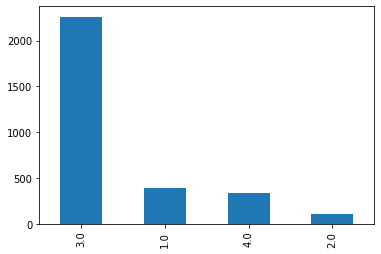

In [18]:
dataset.shape
dataset["ClassId"].value_counts().plot(kind = 'bar')
dataset["ClassId"].value_counts()

In [19]:
# Image argumantatiom
l1=[]
l2=[] 
for ImageId,ClassId,EncodedPixels in tqdm(dataset.values):
    image=cv2.imread("steel defect\\images/{}".format(ImageId),cv2.IMREAD_COLOR)
    if image is not None:
        image=cv2.resize(image,dsize=(120,120))
        l1.append(image)
        l2.append(ClassId)

    

100%|█████████████████████████████████████████████████████████████████████████████| 6014/6014 [00:17<00:00, 346.82it/s]


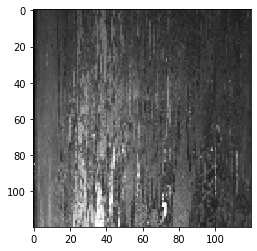

In [20]:
i = 15
plt.imshow(l1[i])

In [21]:
print(len(l1))

3099


In [22]:
encoder = LabelEncoder()
X= np.array(l1)
X = X/255
y = encoder.fit_transform(l2)
y = to_categorical(y)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (2479, 120, 120, 3)
x_test shape: (620, 120, 120, 3)
y_train shape: (2479, 4)
y_test shape: (620, 4)


In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))


In [26]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

In [27]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128)

Train on 2479 samples, validate on 620 samples
Epoch 1/15
2479/2479 [==============================] - 12s 5ms/step - loss: 0.9823 - accuracy: 0.6975 - val_loss: 0.8505 - val_accuracy: 0.7194
Epoch 2/15
2479/2479 [==============================] - 12s 5ms/step - loss: 0.8560 - accuracy: 0.7309 - val_loss: 0.8367 - val_accuracy: 0.7194
Epoch 3/15
2479/2479 [==============================] - 11s 4ms/step - loss: 0.8180 - accuracy: 0.7309 - val_loss: 0.7873 - val_accuracy: 0.7194
Epoch 4/15
2479/2479 [==============================] - 11s 4ms/step - loss: 0.7927 - accuracy: 0.7309 - val_loss: 0.7919 - val_accuracy: 0.7194
Epoch 5/15
2479/2479 [==============================] - 12s 5ms/step - loss: 0.7606 - accuracy: 0.7317 - val_loss: 0.7487 - val_accuracy: 0.7339
Epoch 6/15
2479/2479 [==============================] - 12s 5ms/step - loss: 0.7412 - accuracy: 0.7410 - val_loss: 0.7127 - val_accuracy: 0.7500
Epoch 7/15
2479/2479 [==============================] - 11s 4ms/step - loss: 0.7181

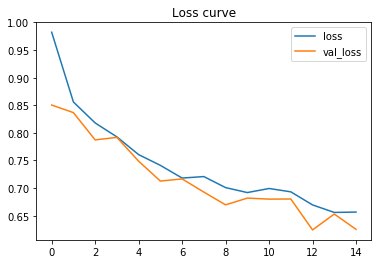

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

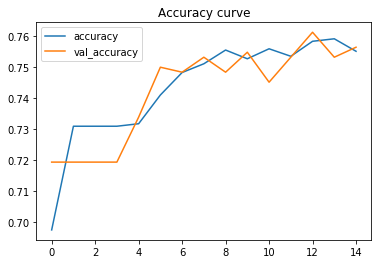

In [29]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [30]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

620/620 [==============================] - 1s 1ms/step
[+] Accuracy: 75.65%
